<a href="https://colab.research.google.com/github/jocelynandrade18/Repositorio2.-/blob/main/Popularidad_de_una_canci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicción de popularidad de una canción**

Cargamos el DataSet

In [2]:
import pandas as pd # Importamos en Pandas

url = "https://raw.githubusercontent.com/mevangelista-alvarado/datasets/refs/heads/main/spotify_songs.csv" # Copiamos el URL
df = pd.read_csv(url) # Muestra en CSV

In [3]:
df # ver el contenido, no es SQL: artista, album, popularidad, duración, explicito, boleano, energía. etc...

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [4]:
# Seleccionar características (features)
features = [ #selecciona solo estas columnas
    'danceability', 'energy', 'key', 'loudness',
    'mode', 'speechiness', 'acousticness', 'instrumentalness',
    'liveness', 'valence', 'tempo', 'duration_ms',
]
X = df[features].values # Define solo la favorita

# Target numérico
y = df['popularity'].values #selecciona solo la popularidad

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, random_state=42
)

In [8]:
from sklearn.model_selection import train_test_split # Importa la función necesaria para dividir los datos

X_train, X_test, y_train, y_test = train_test_split(
    X, y, # X: Conjunto de características; y: Conjunto de etiquetas
    test_size=0.2, # 20% de los datos se destinarán al conjunto de prueba (test)
    random_state=42 # Fija la semilla para dar un número random de 42
) # Cierra el código

In [11]:
from sklearn.preprocessing import StandardScaler # Importa la clase necesaria para estandarizar los datos

scaler = StandardScaler()  # Crea una instancia del objeto StandardScaler

X_train = scaler.fit_transform(X_train) # Aplica esa transformación a X_train
X_test = scaler.transform(X_test) # Calcula prteviamente el conjunto de entrenamiento (fit)

# **Red neuronal multicapa**



Definir el modelo de red neuronal

In [13]:
from tensorflow.keras.models import Sequential # Importa la clase Sequential para construir el modelo capa por capa
from tensorflow.keras.layers import Dense # Importa la clase Dense para definir las capas completamente conectadas

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Define 64 entradas de activación en la primer entrada y las característucas de X_train
    Dense(32, activation='relu'), # Define las 32 entradas de Relu
    Dense(1, activation='linear') # Define la última entrada de Relu
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# **Compilar el modelo**

In [14]:
from tensorflow.keras.optimizers import Adam # Importa la clase del optimizador Adam

# Tasa de aprendizaje deseada
learning_rate = 0.001  # Define la tasa de aprendizaje
adam_optimizer = Adam(learning_rate=learning_rate) # Crea una instancia del optimizador Adam con la tasa de aprendizaje especificada

In [17]:
model.compile( # Compila el modelo definiendo cómo será entrenado
    optimizer=adam_optimizer, # Especifica el optimizador que se definió Adam
    loss='mse', # Define la función de pérdida (Mean Squared Error), ideal para problemas de Regresión
    metrics=['mae'],   # Define la métrica a monitorear durante el entrenamiento
)

# **Entrenar el modelo**

In [19]:
history = model.fit( # Comienza el proceso de entrenamiento y almacena los resultados en la variable "history"
    X_train, # Conjunto de características de entrenamiento
    y_train, # Conjunto de etiquetas (valores reales) de entrenamiento
    validation_split=0.2, # Reserva el 20% de los datos de X_train/y_train para validación
    epochs=50, # Número de veces que el modelo verá todo el conjunto de entrenamiento
    batch_size=50,  # Número de muestras procesadas antes de actualizar los pesos del modelo
)

Epoch 1/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 729.3257 - mae: 21.9168 - val_loss: 484.0067 - val_mae: 18.2129
Epoch 2/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 482.0249 - mae: 18.1737 - val_loss: 475.8460 - val_mae: 17.9425
Epoch 3/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 470.2414 - mae: 17.8679 - val_loss: 467.9632 - val_mae: 17.7547
Epoch 4/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 465.6709 - mae: 17.7557 - val_loss: 465.5045 - val_mae: 17.7314
Epoch 5/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 464.0741 - mae: 17.6814 - val_loss: 463.4355 - val_mae: 17.6521
Epoch 6/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 464.0503 - mae: 17.6950 - val_loss: 462.1100 - val_mae: 17.5196
Epoch 7/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 460.0039 - mae: 17.5915 - val_loss: 464.7267 - val_mae: 17.6000
Epoch 8/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 461.1839 - mae: 17.6080 - val_loss: 459.2463 - val_mae: 

# **Gráficando la función de pérdida**

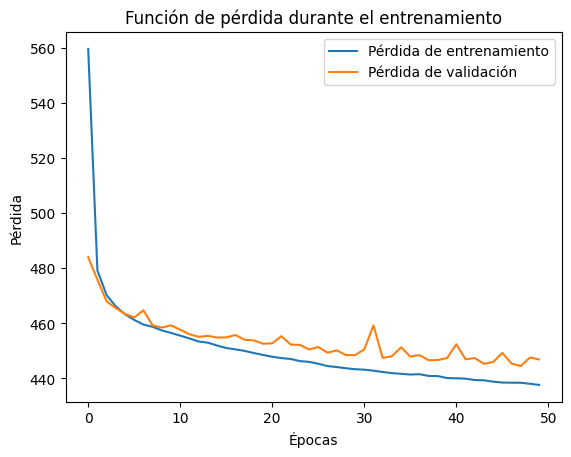

In [20]:
import matplotlib.pyplot as plt # Importa la librería para crear gráficos

plt.plot(history.history['loss'], label='Pérdida de entrenamiento') # Grafica la 'loss' (pérdida)
plt.plot(history.history['val_loss'], label='Pérdida de validación') # Grafica la 'val_loss' (pérdida) en los datos de validación
plt.xlabel('Épocas') # Etiqueta el eje X
plt.ylabel('Pérdida') # Etiqueta el eje Y
plt.legend() # Muestra la leyenda
plt.title('Función de pérdida durante el entrenamiento') # Título del gráfico
plt.show() # Muestra la gráfica final

**Evaluación**

In [22]:
loss, mae = model.evaluate(X_test, y_test) # Evalúa el rendimiento del modelo en el conjunto de prueba
print(f"MAE en el conjunto test: {mae}") # Imprime la métrica clave de interés (MAE)

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 447.5585 - mae: 17.1321
MAE en el conjunto test: 17.065980911254883


# **Predicción**

In [24]:
import pandas as pd # Importa la librería Pandas para crear el DataFrame de comparación

predictions = model.predict(X_test) # El modelo hace predicciones sobre los datos de prueba
comparison = pd.DataFrame({
    'Actual': y_test, # Columna de valores reales
    'Predicted': predictions.flatten() # Columna de valores predichos
})
print(comparison.head()) # Muestra las primeras 5 filas de la tabla de comparación

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
   Actual  Predicted
0      50  50.551998
1      11  10.994400
2       0  29.299437
3       0  27.205229
4      57  37.787308


In [26]:
import pandas as pd # Importa la librería Pandas para crear el DataFrame de comparación

predictions = model.predict(X_test) # El modelo hace predicciones sobre los datos de prueba
comparison = pd.DataFrame({
    'Actual': y_test, # Columna de valores reales
    'Predicted': predictions.flatten() # Columna de valores predichos (aplanados)
})
print(comparison.head()) # Muestra las primeras 5 filas de la tabla de comparación

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
   Actual  Predicted
0      50  50.551998
1      11  10.994400
2       0  29.299437
3       0  27.205229
4      57  37.787308


In [27]:
nombre_cancion = "Beso" # Nombre de la canción

canciones_df = df[df['track_name'].str.contains(nombre_cancion, case=False, na=False)] # Filtra el nombre de la canción sin importar letra sin importar donde se encuentre la palabra dentro del nombre de las canciones

print(f"Canciones encontradas:") # Imprime las canciones que encontraste
canciones_df[['track_name', 'artists', 'album_name']].head() # Define las columnas con nombre, artistas y álbum, muestralos

Canciones encontradas:


,track_name,artists,album_name
1655,Un Beso de Desayuno,Calle 13,Residente o Visitante
17425,Beso Con Baba,Meth Math;Dinamarca,m♡rtal
21293,Son Tus Besos,Cestar,El Verdadero Amor
23145,El Beso (feat. Mathieu Ruz),Dombresky;Crusy,Toolroom Amsterdam 2022
23927,El Beso (feat. Mathieu Ruz),Dombresky;Crusy,El Beso (feat. Mathieu Ruz)


In [28]:
# indice a selecionar
i = 0 # Selecciona la fila (canción) a predecir
cancion = canciones_df.iloc[i] # Extrae los datos de la canción seleccionada
X_input = cancion[features].values.reshape(1, -1) # Prepara las características de la canción para la entrada del modelo
X_input = scaler.transform(X_input) # Estandariza la entrada usando el escalador entrenado

prediccion = model.predict(X_input)[0][0] # Genera la predicción y extrae el valor
print(f"Canción: {cancion['track_name']} - {cancion['artists']}") # Muestra el nombre y artista
print(f"Popularidad real: {cancion['popularity']}") # Muestra la popularidad actual del DataFrame
print(f"Predicción: {prediccion:.2f}") # Muestra el valor predicho, formateado

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Canción: Un Beso de Desayuno - Calle 13
Popularidad real: 20
Predicción: 85013.97


# **Otras métricas**





In [29]:
from sklearn.metrics import r2_score, mean_squared_error # Importa las métricas de evaluación necesarias

r2 = r2_score(y_test, predictions) # Calcula el coeficiente de determinación (R²).
print(f'R²: {r2}') # Muestra el valor de R²

mse = mean_squared_error(y_test, predictions) # Calcula el Error Cuadrático Medio (MSE).
print(f'MSE: {mse}') # Muestra el valor de MSE

R²: 0.10065054893493652
MSE: 443.8117980957031
